# Ayuho Negishi

### Host Behaviour & Market Competitiveness: *How do different host strategies impact listing success and guest satisfaction?* 

Host behaviours shape listing success and guest satisfaction on Airbnb. This EDA explores how identity verification, superhost status, response time, acceptance rate, and pricing strategies influence market competitiveness and guest experiences.

#### Key research questions
- How does host identity verification influence the success of a listing (in terms of reviews and ratings)?
- How do host responses (e.g. response time, acceptance rate) differ between superhosts and non-superhosts, and how does this impact listing success?
- How do hosts with multiple listings strategically set their pricing, and how does this impact guest satisfaction?

## EDA

### Imports

In [1]:
import sys
import os

sys.path.append(os.path.abspath("../../code"))

import altair as alt
import pandas as pd

from toolz.curried import pipe

def json_dir(data, data_dir='altairdata'):
    os.makedirs(data_dir, exist_ok=True)
    return pipe(data, alt.to_json(filename=data_dir + '/{prefix}-{hash}.{extension}') )

# Register and enable the new transformer
alt.data_transformers.register('json_dir', json_dir)
alt.data_transformers.enable('json_dir')

# Handle large data sets (default shows only 5000)
# See here: https://altair-viz.github.io/user_guide/data_transformers.html
alt.data_transformers.disable_max_rows()

alt.renderers.enable('jupyterlab')
from cleaning_workflows import prepare_dataset

In [2]:
# alt.data_transformers.disable_max_rows()

### Loading in the data

In [3]:
df = pd.read_csv('../../data/raw/listings.csv', parse_dates=['first_review', 'last_review'])
df_cleaned = prepare_dataset(df)

In [4]:
print(df_cleaned.shape)
print(df_cleaned.columns)

(37784, 57)
Index(['name', 'description', 'neighborhood_overview', 'host_id', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy

In [5]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 57 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   name                                          37784 non-null  object        
 1   description                                   37784 non-null  object        
 2   neighborhood_overview                         37784 non-null  object        
 3   host_id                                       37784 non-null  int64         
 4   host_since                                    37784 non-null  datetime64[ns]
 5   host_location                                 37784 non-null  object        
 6   host_about                                    37784 non-null  object        
 7   host_response_time                            37784 non-null  object        
 8   host_response_rate                            37784 non-null  floa

In [6]:
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns.tolist()
print(numerical_cols)

['host_id', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']


In [7]:
object_cols = df_cleaned.select_dtypes(include=['object']).columns
print(object_cols)

Index(['name', 'description', 'neighborhood_overview', 'host_location',
       'host_about', 'host_response_time', 'host_neighbourhood',
       'host_verifications', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'amenities'],
      dtype='object')


In [8]:
df_cleaned.describe().drop(columns=['latitude', 'longitude', 'host_id'])

,host_since,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,37784,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,...,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000
mean,2017-03-06 09:48:26.373067776,0.952508,0.812859,263.054864,351.429229,2.754896,1.119654,1.321723,1.383946,170.434126,...,4.704505,4.870094,4.867555,4.775639,4.676217,71.636354,45.435555,23.985232,0.005187,0.685365
min,2008-08-11 00:00:00,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2014-07-07 00:00:00,1.000000,0.840000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,113.750000,...,4.690000,4.890000,4.900000,4.750000,4.670000,1.000000,0.000000,0.000000,0.000000,0.160000
50%,2016-08-02 00:00:00,1.000000,0.880000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,132.000000,...,4.810000,4.950000,4.960000,4.850000,4.760000,2.000000,1.000000,1.000000,0.000000,0.290000
75%,2019-10-29 00:00:00,1.000000,0.950000,10.000000,15.000000,4.000000,1.000000,1.000000,1.000000,156.000000,...,4.910000,5.000000,5.000000,4.950000,4.850000,9.000000,2.000000,2.000000,0.000000,0.550000
max,2024-12-27 00:00:00,1.000000,1.000000,5079.000000,9048.000000,16.000000,15.500000,16.000000,42.000000,20000.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,1154.000000,1154.000000,739.000000,4.000000,116.300000
std,NaN,0.173547,0.232501,1000.361076,1196.815995,1.903900,0.442243,0.869987,0.984719,277.145183,...,0.423313,0.317409,0.345344,0.331185,0.413567,224.585038,200.899492,109.136674,0.086848,1.584030


## Q1. How does host identity verification influence the success of a listing (in terms of reviews and ratings)?

The box plot shows that verified hosts (host_identity_verified = t) have many extreme outliers in both the number of reviews (number_of_reviews) and the ratings (review_scores_rating). Notably, the extreme values for the number of reviews tend to be higher, whereas the extreme values for ratings tend to be lower. This suggests that while verified hosts are more active and receive a larger number of reviews, some of them may also experience lower ratings.

From a market competitiveness perspective, this indicates that being verified is associated with a higher volume of guest feedback, but it does not guarantee consistently high ratings. In other words, although professional or commercial hosts who are verified might attract more guests, they may also face challenges in maintaining high guest satisfaction levels. Further analysis is needed to explore whether these lower ratings are due to factors like over-commercialization or other operational issues.

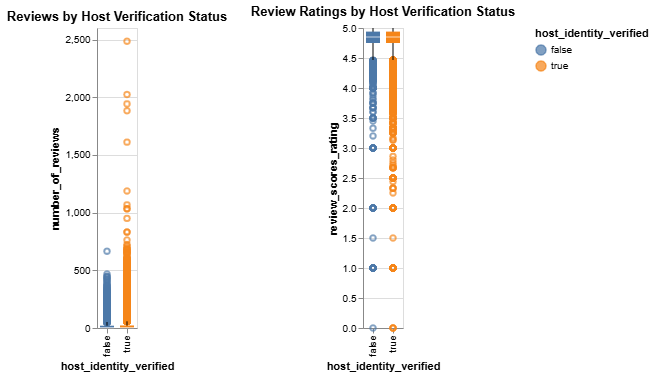

In [9]:
df_identity = df_cleaned[["host_identity_verified", "number_of_reviews", "review_scores_rating"]]

identity_reviews = alt.Chart(df_identity).mark_boxplot().encode(
    alt.X("host_identity_verified:N"),
    alt.Y("number_of_reviews:Q"),
    alt.Color("host_identity_verified:N"),
    tooltip=["host_identity_verified", "number_of_reviews"]
).properties(
    title="Reviews by Host Verification Status"
)

identity_rating = alt.Chart(df_identity).mark_boxplot().encode(
    alt.X("host_identity_verified:N"),
    alt.Y("review_scores_rating:Q"),
    alt.Color("host_identity_verified:N"),
    tooltip=["host_identity_verified", "review_scores_rating"]
).properties(
    title="Review Ratings by Host Verification Status"
)

identity_reviews | identity_rating


## Q2. How do host responses (e.g. response time, acceptance rate) differ between superhosts and non-superhosts, and how does this impact listing success?

The stacked bar chart shows the distribution of response times among superhosts and non-superhosts. We can see that superhosts have a higher proportion of faster response times (e.g., “within an hour” or “within a few hours”) compared to non-superhosts. This suggests that superhosts may prioritize prompt communication as part of their competitive strategy. On the other hand, a greater share of non-superhosts fall into slower categories or have “No response time,” which could reduce their competitiveness if guests prefer hosts who reply quickly.

The box plot indicates that superhosts generally have higher acceptance rates, although there is some overlap. A higher acceptance rate means these hosts are more likely to accept booking requests, which can lead to more reviews and higher visibility in the Airbnb marketplace. However, some non-superhosts also exhibit relatively high acceptance rates, suggesting that being a superhost is not the only way to maintain a competitive edge.

From a Host Behavior & Market Competitiveness standpoint, these findings imply that faster response times and higher acceptance rates may serve as strategic advantages. Hosts who respond quickly and accept more reservations could attract more guests, leading to better listing performance. While superhost status often aligns with these behaviors, non-superhosts can still compete by adopting similar strategies. In future analyses, examining how these behaviors relate to listing success metrics (e.g., number of reviews, average ratings, or booking frequency) would clarify the direct impact on market competitiveness.

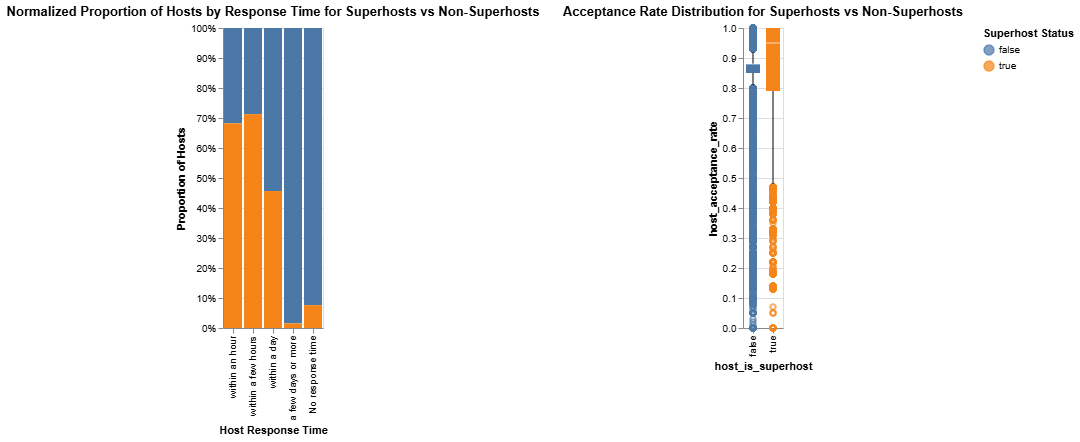

In [10]:
response_time_order = ["within an hour", "within a few hours", "within a day", "a few days or more", "No response time"]

df_host_responses = df_cleaned[["host_is_superhost", "host_response_time", "host_acceptance_rate", "number_of_reviews", "review_scores_rating"]]
df_host_responses.loc[:, "host_response_time"] = pd.Categorical(df_host_responses["host_response_time"], categories=response_time_order, ordered=True)

grouped_data = df_host_responses.groupby(["host_is_superhost", "host_response_time"]).size().reset_index(name="count")
total_counts = grouped_data.groupby("host_is_superhost")["count"].transform("sum")
grouped_data["proportion"] = grouped_data["count"] / total_counts

normalized_chart = alt.Chart(grouped_data).mark_bar().encode(
    alt.X("host_response_time:O", sort=response_time_order, title="Host Response Time"),
    alt.Y("proportion:Q", title="Proportion of Hosts", stack="normalize"),
    alt.Color("host_is_superhost:N", title="Superhost Status"),
    alt.Tooltip(["host_response_time:N", "proportion:Q", "host_is_superhost:N"])
).properties(
    title="Normalized Proportion of Hosts by Response Time for Superhosts vs Non-Superhosts"
)

acceptance_rate_plot = alt.Chart(df_host_responses).mark_boxplot().encode(
    alt.X("host_is_superhost:N"),  
    alt.Y("host_acceptance_rate:Q"),  
    alt.Color("host_is_superhost:N")
).properties(
    title="Acceptance Rate Distribution for Superhosts vs Non-Superhosts"
)

normalized_chart | acceptance_rate_plot


## Q3. How do hosts with multiple listings strategically set their pricing, and how does this impact guest satisfaction?

This plot illustrates how hosts with varying numbers of listings set their average price, and how those listings are rated by guests. Overall, it appears that hosts with multiple listings may keep their prices lower to remain competitive and attract more guests. On the other hand, hosts with fewer listings may set higher prices, possibly offering more unique experiences or specialized services. This finding highlights how host strategies influence pricing and gives insight into market competitiveness. 

However, from the colour scale (guest ratings), we observe that higher or lower pricing strategies do not uniformly guarantee higher guest satisfaction. While certain bins with many listings show slightly lower average ratings, others remain comparable to those of hosts with fewer listings. This suggests that pricing alone may not be the sole driver of guest satisfaction, and that other factors, such as property type, location, or host responsiveness could also influence how guests perceive their stay.


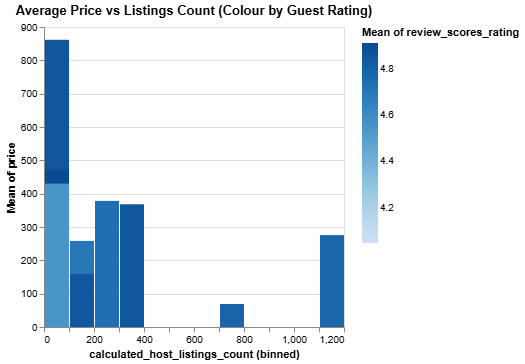

In [11]:
df_listings_price_reviews = df_cleaned[["calculated_host_listings_count", "price", "review_scores_rating"]]

bar_graph = alt.Chart(df_listings_price_reviews).mark_bar().encode(
    alt.X("calculated_host_listings_count:Q", bin=alt.BinParams(maxbins=20)),  
    alt.Y("mean(price):Q"),  
    alt.Color("mean(review_scores_rating):Q", scale=alt.Scale(scheme="blues")), 
    alt.Tooltip(["calculated_host_listings_count:Q", "mean(price):Q", "mean(review_scores_rating):Q"])  
).properties(
    title="Average Price vs Listings Count (Colour by Guest Rating)"
)

bar_graph


# Task Analysis

### Q1

1. Retrieve Value: host_identity_verified, number_of_reviews, review_scores_rating.
2. Filter: Separate data into two groups (verified hosts ("t") vs non-verified hosts ("f")) to compare their success.
3. Characterize Distribution: Use boxplots and histograms to visualize the distribution of number_of_reviews and review_scores_rating.
4. Correlate: Compare the average review count and rating for verified vs. non-verified hosts to see if verification improves success.
5. Find Extremum: Identify the hosts with the highest or lowest reviews and ratings in both groups to check for unusual trends.

### Q2

1. Retrieve Value (Extract Data): host_is_superhost, host_response_time, host_acceptance_rate, number_of_reviews, review_scores_rating. 
2. Filter: Split data into superhosts (host_is_superhost = 't') vs non-superhosts (host_is_superhost = 'f') to compare performance.
3. Sort: Group host_response_time into categories to observe response speed trends.
4. Characterize Distribution: Use stacked bar chart to show the proportion of response times for superhosts vs non-superhosts. Also, create boxplot to compare host_acceptance_rate to see if superhosts have higher booking acceptance.
5. Correlate: Analyze how host_response_time and host_acceptance_rate influence number_of_reviews and review_scores_rating.
6. Find Extremum: Identify superhosts with the highest or lowest acceptance rates and compare their success metrics.

### Q3

1. Retrieve Value: Extract "calculated_host_listings_count", "price", "review_scores_rating".
2. Filter: Group calculated_host_listings_count into bins (e.g. 1-5, 6-20, 21-100) and compare price and ratings across groups.
3. Compute Derived Value: Create Price_Rating_Ratio = price / review_scores_rating to analyze if higher prices lead to lower ratings.
4. Characterize Distribution: Use bar chart to show how the average price changes based on the number of listings a host owns. Also, use review_scores_rating as a colour scale to examine its relationship with pricing strategies.
5. Correlate: Investigate how the number of listings affects pricing and whether pricing influences review_scores_rating.
6. Find Extremum: 
- Identify hosts with the most listings and compare their pricing strategies.
- Identify highest-priced vs lowest-priced listings and compare their guest satisfaction ratings.